# Mimic-III Datasets & Pre-processing
**contact:** drew.wilimitis@vumc.org

## Import Libraries

In [1]:
# import libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# set matplotlib style and plotting configuration
plt.style.use('seaborn')
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# # load models for plotting and try new plotting format
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)

## Load Data

### Get features for each subject

In [2]:
# load subject level csv files (should have three csv files per subject)
processed_data_path = '../mimic3-Original/data/root/'
train_subject_folders = os.listdir(processed_data_path + 'train')
train_subject_folders = [x for x in train_subject_folders if x.isnumeric()]
len(train_subject_folders)
train_subject_folders[:5]
np.sort(train_subject_folders)

# initial test set from pre-processing
test_subject_folders = os.listdir(processed_data_path + 'test')
test_subject_folders = [x for x in test_subject_folders if x.isnumeric()]
len(test_subject_folders)
test_subject_folders[:5]
np.sort(test_subject_folders)

28728

['50447', '78238', '13966', '351', '9804']

array(['100', '1000', '10003', ..., '99992', '99995', '99999'],
      dtype='<U5')

5070

['86291', '4596', '9407', '46693', '60399']

array(['10000', '1001', '10011', ..., '9992', '99937', '99983'],
      dtype='<U5')

In [3]:
# read in data files for given subject folder
ex_subject = train_subject_folders[0]
ex_subject_files = os.listdir(processed_data_path + 'train/' + ex_subject)
ex_subject_dfs = []
ex_subject_file_names = []
for file in ex_subject_files:
    if '.csv' in file:
        name = file.split('.csv')[0]
        ex_subject_file_names.append(name)
        df = pd.read_csv(processed_data_path + 'train/' + ex_subject + '/' + file)
        ex_subject_dfs.append(df)
ex_subject_files
ex_subject_file_names

['episode1_timeseries.csv',
 'episode1.csv',
 'diagnoses.csv',
 'events.csv',
 'stays.csv']

['episode1_timeseries', 'episode1', 'diagnoses', 'events', 'stays']

In [4]:
# define as dictionary and explore subject dataframes
ex_subject_dict = dict(zip(ex_subject_file_names, ex_subject_dfs))
for name in ex_subject_file_names:
    print(name.upper())
    df = ex_subject_dict[name]
    df.head()
    df.shape
    df.isna().sum()

EPISODE1_TIMESERIES


,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,1.857500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.207500,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
2,2.374167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
3,2.390833,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,NaN,177.0,NaN,NaN,NaN
4,2.407500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN


(65, 18)

Hours                                  0
Capillary refill rate                 65
Diastolic blood pressure              22
Fraction inspired oxygen              55
Glascow coma scale eye opening        57
Glascow coma scale motor response     57
Glascow coma scale total              65
Glascow coma scale verbal response    57
Glucose                               57
Heart Rate                            26
Height                                64
Mean blood pressure                   23
Oxygen saturation                     26
Respiratory rate                      25
Systolic blood pressure               22
Temperature                           49
Weight                                60
pH                                    61
dtype: int64

EPISODE1


,Icustay,Ethnicity,Gender,Age,Height,Weight,Length of Stay,Mortality,Diagnosis 4019,Diagnosis 4280,...,Diagnosis 570,Diagnosis 71590,Diagnosis 2869,Diagnosis 2763,Diagnosis 5770,Diagnosis V5865,Diagnosis 99662,Diagnosis 28860,Diagnosis 36201,Diagnosis 56210
0,253123,4,1,53.71937,163.0,70.397478,1.4437,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1, 136)

Icustay            0
Ethnicity          0
Gender             0
Age                0
Height             0
                  ..
Diagnosis V5865    0
Diagnosis 99662    0
Diagnosis 28860    0
Diagnosis 36201    0
Diagnosis 56210    0
Length: 136, dtype: int64

DIAGNOSES


,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE,ICUSTAY_ID,HCUP_CCS_2015,USE_IN_BENCHMARK
0,50447,127105,1,53210,Ac duodenal ulcer w perf,"Acute duodenal ulcer with perforation, without...",253123,Gastroduodenal ulcer (except hemorrhage),0
1,50447,127105,2,30421,Cocaine depend-contin,"Cocaine dependence, continuous",253123,Substance-related disorders,0
2,50447,127105,3,30401,Opioid dependence-contin,"Opioid type dependence, continuous",253123,Substance-related disorders,0
3,50447,127105,4,56889,Peritoneal disorder NEC,Other specified disorders of peritoneum,253123,Other gastrointestinal disorders,0
4,50447,127105,5,07054,Chrnc hpt C wo hpat coma,Chronic hepatitis C without mention of hepatic...,253123,Hepatitis,0


(10, 9)

SUBJECT_ID          0
HADM_ID             0
SEQ_NUM             0
ICD9_CODE           0
SHORT_TITLE         0
LONG_TITLE          0
ICUSTAY_ID          0
HCUP_CCS_2015       0
USE_IN_BENCHMARK    0
dtype: int64

EVENTS


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM
0,50447,127105,253123,2164-06-18 13:00:00,220179,151,mmHg
1,50447,127105,253123,2164-06-18 13:00:00,220180,73,mmHg
2,50447,127105,253123,2164-06-18 13:00:00,220181,87,mmHg
3,50447,127105,253123,2164-06-18 13:00:00,220210,19,insp/min
4,50447,127105,253123,2164-06-18 13:00:00,220277,95,%


(2009, 7)

SUBJECT_ID       0
HADM_ID          0
ICUSTAY_ID       0
CHARTTIME        0
ITEMID           0
VALUE            0
VALUEUOM      1429
dtype: int64

STAYS


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LAST_CAREUNIT,DBSOURCE,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,DIAGNOSIS,GENDER,DOB,DOD,AGE,MORTALITY_INUNIT,MORTALITY,MORTALITY_INHOSPITAL
0,50447,127105,253123,TSICU,metavision,2164-06-17 03:47:33,2164-06-18 14:26:30,1.4437,2164-06-17 03:06:00,2164-06-24 13:00:00,NaN,WHITE,PERFORATED BOWEL,F,2110-09-28 00:00:00,NaN,53.71937,0,0,0


(1, 20)

SUBJECT_ID              0
HADM_ID                 0
ICUSTAY_ID              0
LAST_CAREUNIT           0
DBSOURCE                0
INTIME                  0
OUTTIME                 0
LOS                     0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               1
ETHNICITY               0
DIAGNOSIS               0
GENDER                  0
DOB                     0
DOD                     1
AGE                     0
MORTALITY_INUNIT        0
MORTALITY               0
MORTALITY_INHOSPITAL    0
dtype: int64

In [5]:
# set of dataframes for given subject
ex_stays = ex_subject_dict['stays']
ex_ep1 = ex_subject_dict['episode1']
ex_events = ex_subject_dict['events']
ex_ep1_ts = ex_subject_dict['episode1_timeseries']
ex_diag = ex_subject_dict['diagnoses']

# stays dataframe
ex_stays
ex_stays.shape
ex_stays.columns
ex_stays.isna().sum()
ex_stays.dtypes

# timeseries data
ex_ep1_ts
ex_ep1_ts.shape
ex_ep1_ts.columns
ex_ep1_ts.dtypes
ex_ep1_ts.isna().mean()
ex_ep1_ts.mean(axis=0)

# episode 1 datframe
ex_ep1
ex_ep1.shape
ex_ep1.dtypes
print(ex_ep1.columns.to_list())
diag_cols = [x for x in ex_ep1.columns.to_list() if 'Diagnosis' in x]
ex_ep1[diag_cols].sum().sort_values(ascending=False)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LAST_CAREUNIT,DBSOURCE,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,DIAGNOSIS,GENDER,DOB,DOD,AGE,MORTALITY_INUNIT,MORTALITY,MORTALITY_INHOSPITAL
0,50447,127105,253123,TSICU,metavision,2164-06-17 03:47:33,2164-06-18 14:26:30,1.4437,2164-06-17 03:06:00,2164-06-24 13:00:00,NaN,WHITE,PERFORATED BOWEL,F,2110-09-28 00:00:00,NaN,53.71937,0,0,0


(1, 20)

Index(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LAST_CAREUNIT', 'DBSOURCE',
       'INTIME', 'OUTTIME', 'LOS', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ETHNICITY', 'DIAGNOSIS', 'GENDER', 'DOB', 'DOD', 'AGE',
       'MORTALITY_INUNIT', 'MORTALITY', 'MORTALITY_INHOSPITAL'],
      dtype='object')

SUBJECT_ID              0
HADM_ID                 0
ICUSTAY_ID              0
LAST_CAREUNIT           0
DBSOURCE                0
INTIME                  0
OUTTIME                 0
LOS                     0
ADMITTIME               0
DISCHTIME               0
DEATHTIME               1
ETHNICITY               0
DIAGNOSIS               0
GENDER                  0
DOB                     0
DOD                     1
AGE                     0
MORTALITY_INUNIT        0
MORTALITY               0
MORTALITY_INHOSPITAL    0
dtype: int64

SUBJECT_ID                int64
HADM_ID                   int64
ICUSTAY_ID                int64
LAST_CAREUNIT            object
DBSOURCE                 object
INTIME                   object
OUTTIME                  object
LOS                     float64
ADMITTIME                object
DISCHTIME                object
DEATHTIME               float64
ETHNICITY                object
DIAGNOSIS                object
GENDER                   object
DOB                      object
DOD                     float64
AGE                     float64
MORTALITY_INUNIT          int64
MORTALITY                 int64
MORTALITY_INHOSPITAL      int64
dtype: object

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,1.857500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.207500,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
2,2.374167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
3,2.390833,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,NaN,177.0,NaN,NaN,NaN
4,2.407500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,31.207500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,77.0,94.0,22.0,NaN,NaN,NaN,NaN
61,31.240833,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN
62,32.207500,NaN,61.0,0.5,NaN,NaN,NaN,NaN,NaN,109.0,NaN,81.0,98.0,19.0,138.0,NaN,NaN,NaN
63,33.207500,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,87.0,95.0,19.0,151.0,NaN,NaN,NaN


(65, 18)

Index(['Hours', 'Capillary refill rate', 'Diastolic blood pressure',
       'Fraction inspired oxygen', 'Glascow coma scale eye opening',
       'Glascow coma scale motor response', 'Glascow coma scale total',
       'Glascow coma scale verbal response', 'Glucose', 'Heart Rate', 'Height',
       'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate',
       'Systolic blood pressure', 'Temperature', 'Weight', 'pH'],
      dtype='object')

Hours                                 float64
Capillary refill rate                 float64
Diastolic blood pressure              float64
Fraction inspired oxygen              float64
Glascow coma scale eye opening         object
Glascow coma scale motor response      object
Glascow coma scale total              float64
Glascow coma scale verbal response     object
Glucose                               float64
Heart Rate                            float64
Height                                float64
Mean blood pressure                   float64
Oxygen saturation                     float64
Respiratory rate                      float64
Systolic blood pressure               float64
Temperature                           float64
Weight                                float64
pH                                    float64
dtype: object

Hours                                 0.000000
Capillary refill rate                 1.000000
Diastolic blood pressure              0.338462
Fraction inspired oxygen              0.846154
Glascow coma scale eye opening        0.876923
Glascow coma scale motor response     0.876923
Glascow coma scale total              1.000000
Glascow coma scale verbal response    0.876923
Glucose                               0.876923
Heart Rate                            0.400000
Height                                0.984615
Mean blood pressure                   0.353846
Oxygen saturation                     0.400000
Respiratory rate                      0.384615
Systolic blood pressure               0.338462
Temperature                           0.753846
Weight                                0.923077
pH                                    0.938462
dtype: float64

Hours                        13.614936
Capillary refill rate              NaN
Diastolic blood pressure     65.000000
Fraction inspired oxygen      0.500000
Glascow coma scale total           NaN
Glucose                      97.125000
Heart Rate                  103.282051
Height                      163.000000
Mean blood pressure          80.333333
Oxygen saturation            97.410256
Respiratory rate             22.400000
Systolic blood pressure     118.906977
Temperature                  36.490972
Weight                       71.569920
pH                            7.417500
dtype: float64

,Icustay,Ethnicity,Gender,Age,Height,Weight,Length of Stay,Mortality,Diagnosis 4019,Diagnosis 4280,...,Diagnosis 570,Diagnosis 71590,Diagnosis 2869,Diagnosis 2763,Diagnosis 5770,Diagnosis V5865,Diagnosis 99662,Diagnosis 28860,Diagnosis 36201,Diagnosis 56210
0,253123,4,1,53.71937,163.0,70.397478,1.4437,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1, 136)

Icustay              int64
Ethnicity            int64
Gender               int64
Age                float64
Height             float64
                    ...   
Diagnosis V5865      int64
Diagnosis 99662      int64
Diagnosis 28860      int64
Diagnosis 36201      int64
Diagnosis 56210      int64
Length: 136, dtype: object

['Icustay', 'Ethnicity', 'Gender', 'Age', 'Height', 'Weight', 'Length of Stay', 'Mortality', 'Diagnosis 4019', 'Diagnosis 4280', 'Diagnosis 41401', 'Diagnosis 42731', 'Diagnosis 25000', 'Diagnosis 5849', 'Diagnosis 2724', 'Diagnosis 51881', 'Diagnosis 53081', 'Diagnosis 5990', 'Diagnosis 2720', 'Diagnosis 2859', 'Diagnosis 2449', 'Diagnosis 486', 'Diagnosis 2762', 'Diagnosis 2851', 'Diagnosis 496', 'Diagnosis V5861', 'Diagnosis 99592', 'Diagnosis 311', 'Diagnosis 0389', 'Diagnosis 5859', 'Diagnosis 5070', 'Diagnosis 40390', 'Diagnosis 3051', 'Diagnosis 412', 'Diagnosis V4581', 'Diagnosis 2761', 'Diagnosis 41071', 'Diagnosis 2875', 'Diagnosis 4240', 'Diagnosis V1582', 'Diagnosis V4582', 'Diagnosis V5867', 'Diagnosis 4241', 'Diagnosis 40391', 'Diagnosis 78552', 'Diagnosis 5119', 'Diagnosis 42789', 'Diagnosis 32723', 'Diagnosis 49390', 'Diagnosis 9971', 'Diagnosis 2767', 'Diagnosis 2760', 'Diagnosis 2749', 'Diagnosis 4168', 'Diagnosis 5180', 'Diagnosis 45829', 'Diagnosis 4589', 'Diagnosis

Diagnosis 30000    1
Diagnosis 3051     1
Diagnosis 49390    1
Diagnosis 07054    1
Diagnosis 4275     0
                  ..
Diagnosis 42789    0
Diagnosis 5119     0
Diagnosis 78552    0
Diagnosis 40391    0
Diagnosis 56210    0
Length: 128, dtype: int64

In [6]:
# function to merge files for each subject
def get_subject_df(path_to_subject_data, subject_id, stay_cols, ep_cols, diag_cols=None, ts_cols=None):
    
    # get path to subject data folder
    i = 0
    subject_dir_path = path_to_subject_data + str(subject_id)
    subject_files = os.listdir(subject_dir_path)
    
    # stay files (time invariant)
    if 'stays.csv' in subject_files:
        stay_df = pd.read_csv(subject_dir_path + '/' + 'stays.csv')
        stay_df = stay_df[stay_cols]
        stay_df.columns = ['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ADMITTIME', 'DISCHTIME', 'ETHNICITY', 'GENDER',
                           'AGE', 'PRIMARY_DIAGNOSIS', 'LOS_STAY_LABEL', 'MORTALITY_STAY_LABEL',
                           'MORTALITY_INHOSPITAL_STAY_LABEL']
    ordered_stay_ids = stay_df.sort_values(by='ADMITTIME', ascending=True)['ICUSTAY_ID'].unique()
    
    # episode files (time invariant)
    total_episodes_missing = 0
    episode_files = [x for x in subject_files if 'episode' in x and 'timeseries' not in x]
    if episode_files != []:
        ep_dfs = []
        for file in episode_files:
            ep_df = pd.read_csv(subject_dir_path + '/' + file)
            ep_df = ep_df[ep_cols]
            ep_dfs.append(ep_df)
        episode_df = pd.concat(ep_dfs)
        ep_diag_cols = [x.upper() for x in ep_cols if 'Diagnosis' in x]
        episode_df.columns = ['ICUSTAY_ID', 'ETHNICITY_NUM', 'GENDER_NUM', 'HEIGHT', 'WEIGHT',
                              'LOS_EPISODE_LABEL', 'MORTALITY_EPISODE_LABEL'] + ep_diag_cols
        subject_df = stay_df.merge(episode_df, on='ICUSTAY_ID')
    else:
        # add NA columns for subjects without episode data
        total_episodes_missing += 1
        print('No episode.csv files found for subject: ' + str(subject_id))
        fill_ep_df = pd.DataFrame(np.repeat(np.nan, len(ep_cols)).reshape(1,-1), columns=ep_cols)
        fill_ep_df['ICUSTAY_ID'] = stay_df['ICUSTAY_ID']
        subject_df = stay_df.merge(fill_ep_df, on='ICUSTAY_ID')
        
    # timeseries data
    total_ts_events_missing = 0
    ts_files = [x for x in subject_files if 'timeseries' in x]
    if ts_files != [] and ts_cols != None:
        ts_dfs = []
        for i, file in enumerate(ts_files):
            ts_df = pd.read_csv(subject_dir_path + '/' + file)
            ts_mean_values = pd.DataFrame(ts_df[ts_cols].mean(axis=0)).T
            ts_mean_values['Hours'] = ts_df['Hours'].max(axis=0)
            ts_mean_values['ICUSTAY_ID'] = ordered_stay_ids[i]
            ts_dfs.append(ts_mean_values)
        timeseries_df = pd.concat(ts_dfs)
        subject_df = subject_df.merge(timeseries_df, on='ICUSTAY_ID')
    else:
        # add NA columns for subjects without episode timeseries data
        total_ts_events_missing += 1
        print('No episode_timeseries files found for subject: ' + str(subject_id))
        fill_ts_cols = ts_cols + ['Hours']
        fill_ts_df = pd.DataFrame(np.repeat(np.nan, len(fill_ts_cols)).reshape(1,-1), columns=fill_ts_cols)
        fill_ts_df['ICUSTAY_ID'] = subject_df['ICUSTAY_ID']
        subject_df = subject_df.merge(fill_ts_df, on='ICUSTAY_ID')
    i += 1
    if i%1000 == 0:
        print('Total subjects missing episode data: {} and timeseries data: {}'.format(total_episodes_missing, total_ts_events_missing))
    return subject_df

In [7]:
# set columns to use from each dataframe (note: decide what to do with duplicates like mortality/LOS)
stay_cols = ['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ADMITTIME', 'DISCHTIME', 'ETHNICITY', 'GENDER', 'AGE',
             'DIAGNOSIS', 'LOS', 'MORTALITY', 'MORTALITY_INHOSPITAL']
ep_cols = ['Icustay', 'Ethnicity', 'Gender', 'Height', 'Weight', 'Length of Stay', 'Mortality'] + diag_cols
ts_cols = ex_subject_dict['episode1_timeseries'].columns.tolist()
train_subject_filepath = processed_data_path + 'train/'
test_subject_filepath = processed_data_path + 'test/'
tmp_df = get_subject_df(path_to_subject_data = train_subject_filepath, subject_id = 15970,
                        stay_cols = stay_cols, ep_cols = ep_cols, ts_cols=ts_cols)
tmp_df.head()
tmp_df.shape
tmp_df.columns

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,15970,136407,206884,2118-02-19 20:20:00,2118-02-23 14:20:00,WHITE,M,51.126626,DEHYDRATION/INCREASE BS,0.7822,...,235.0,89.666667,NaN,67.944444,99.153846,20.222222,110.333333,37.111122,70.5,7.33


(1, 161)

Index(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ADMITTIME', 'DISCHTIME',
       'ETHNICITY', 'GENDER', 'AGE', 'PRIMARY_DIAGNOSIS', 'LOS_STAY_LABEL',
       ...
       'Glucose', 'Heart Rate', 'Height', 'Mean blood pressure',
       'Oxygen saturation', 'Respiratory rate', 'Systolic blood pressure',
       'Temperature', 'Weight', 'pH'],
      dtype='object', length=161)

In [8]:
# loop through subject IDs and return dataframes
train_dfs = []
for subject_id in train_subject_folders:
    subject_df = get_subject_df(path_to_subject_data = train_subject_filepath, subject_id = subject_id,
                                stay_cols = stay_cols, ep_cols = ep_cols, ts_cols=ts_cols)
    train_dfs.append(subject_df)

test_dfs = []
for subject_id in test_subject_folders:
    subject_df = get_subject_df(path_to_subject_data = test_subject_filepath, subject_id = subject_id,
                                stay_cols = stay_cols, ep_cols = ep_cols, ts_cols=ts_cols)
    test_dfs.append(subject_df)

No episode.csv files found for subject: 11604
No episode_timeseries files found for subject: 11604
No episode.csv files found for subject: 7119
No episode_timeseries files found for subject: 7119
No episode.csv files found for subject: 4063
No episode_timeseries files found for subject: 4063
No episode.csv files found for subject: 66412
No episode_timeseries files found for subject: 66412
No episode.csv files found for subject: 2571
No episode_timeseries files found for subject: 2571
No episode.csv files found for subject: 6121
No episode_timeseries files found for subject: 6121
No episode.csv files found for subject: 8904
No episode_timeseries files found for subject: 8904
No episode.csv files found for subject: 24481
No episode_timeseries files found for subject: 24481
No episode.csv files found for subject: 12952
No episode_timeseries files found for subject: 12952
No episode.csv files found for subject: 73770
No episode_timeseries files found for subject: 73770
No episode.csv files

No episode.csv files found for subject: 30099
No episode_timeseries files found for subject: 30099
No episode.csv files found for subject: 12683
No episode_timeseries files found for subject: 12683
No episode.csv files found for subject: 11373
No episode_timeseries files found for subject: 11373
No episode.csv files found for subject: 18649
No episode_timeseries files found for subject: 18649
No episode.csv files found for subject: 10358
No episode_timeseries files found for subject: 10358
No episode.csv files found for subject: 22699
No episode_timeseries files found for subject: 22699
No episode.csv files found for subject: 77771
No episode_timeseries files found for subject: 77771
No episode.csv files found for subject: 61519
No episode_timeseries files found for subject: 61519
No episode.csv files found for subject: 18074
No episode_timeseries files found for subject: 18074
No episode.csv files found for subject: 26393
No episode_timeseries files found for subject: 26393
No episode

In [9]:
# get dataframes from all subjects with stay and episode dataframes
train_dfs[0].head()
train_dfs[0].shape
train_dfs = np.array(train_dfs)
train_ix = np.array([len(df.columns) for df in train_dfs]) == 161
np.sum(train_ix)
np.mean(train_ix)

test_dfs[0].head()
test_dfs[0].shape
test_dfs = np.array(test_dfs)
test_ix = np.array([len(df.columns) for df in test_dfs]) == 161
np.sum(test_ix)
np.mean(test_ix)

train_data = pd.concat(train_dfs[train_ix])
test_data = pd.concat(test_dfs[test_ix])

# combine train/test data
combined_subject_df = pd.concat([train_data, test_data])
combined_subject_df.head()
combined_subject_df.shape

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,50447,127105,253123,2164-06-17 03:06:00,2164-06-24 13:00:00,WHITE,F,53.71937,PERFORATED BOWEL,1.4437,...,97.125,103.282051,163.0,80.333333,97.410256,22.4,118.906977,36.490972,71.56992,7.4175


(1, 161)

28429

0.9895920356446672

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,86291,168035,266101,2168-10-31 16:33:00,2168-11-09 17:10:00,ASIAN,M,85.015743,NON Q WAVE MYOCARDIAL INFACTION\CARDIAC CATH,3.0815,...,113.842105,86.602151,168.0,74.43956,97.89899,20.395833,124.747253,36.160684,59.767566,7.373333


(1, 161)

5026

0.9913214990138067

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,50447,127105,253123,2164-06-17 03:06:00,2164-06-24 13:00:00,WHITE,F,53.719370,PERFORATED BOWEL,1.4437,...,97.125000,103.282051,163.0,80.333333,97.410256,22.400000,118.906977,36.490972,71.569920,7.417500
0,78238,195560,224253,2150-09-29 21:20:00,2150-10-01 14:00:00,WHITE,F,77.275838,AORTIC STENOSIS\RIGHT AND LEFT HEART CATHETERI...,0.8005,...,113.000000,67.263158,163.0,62.157895,97.000000,16.894737,107.250000,36.888889,77.703000,NaN
1,78238,148934,259839,2150-10-23 10:43:00,2150-10-28 12:34:00,WHITE,F,77.341547,AVR,2.4825,...,113.291667,63.093333,155.0,69.486486,97.065789,14.833333,113.534247,36.726768,81.278796,7.390000
0,13966,166620,231548,2187-10-07 20:04:00,2187-10-10 14:44:00,WHITE,M,74.349076,S/P FALL,0.9708,...,144.000000,95.620690,NaN,77.218390,94.909091,21.500000,148.068966,36.912720,NaN,7.380000
0,351,174800,281750,2171-07-16 23:13:00,2171-07-25 19:36:00,BLACK/AFRICAN AMERICAN,F,51.071869,"BREAST MASS, HYPOXIA",3.8597,...,99.333333,93.056338,NaN,93.820484,89.393939,19.926471,134.695652,37.141987,208.000000,7.323333


(41124, 161)

In [10]:
# write dataframes to csv
train_data.head()
train_data.shape
train_data.SUBJECT_ID.nunique()
train_data.ICUSTAY_ID.nunique()
train_data.to_csv('../data/MIMIC3_FULL_TRAINING_DATASET_20221022.csv', index=False)

test_data.head()
test_data.shape
test_data.SUBJECT_ID.nunique()
test_data.ICUSTAY_ID.nunique()
test_data.to_csv('../data/MIMIC3_FULL_TEST_DATASET_20221022.csv', index=False)

combined_subject_df.head()
combined_subject_df.shape
combined_subject_df.SUBJECT_ID.nunique()
combined_subject_df.ICUSTAY_ID.nunique()
combined_subject_df.to_csv('../data/MIMIC3_FULL_COMBINED_DATASET_20221022.csv', index=False)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,50447,127105,253123,2164-06-17 03:06:00,2164-06-24 13:00:00,WHITE,F,53.719370,PERFORATED BOWEL,1.4437,...,97.125000,103.282051,163.0,80.333333,97.410256,22.400000,118.906977,36.490972,71.569920,7.417500
0,78238,195560,224253,2150-09-29 21:20:00,2150-10-01 14:00:00,WHITE,F,77.275838,AORTIC STENOSIS\RIGHT AND LEFT HEART CATHETERI...,0.8005,...,113.000000,67.263158,163.0,62.157895,97.000000,16.894737,107.250000,36.888889,77.703000,NaN
1,78238,148934,259839,2150-10-23 10:43:00,2150-10-28 12:34:00,WHITE,F,77.341547,AVR,2.4825,...,113.291667,63.093333,155.0,69.486486,97.065789,14.833333,113.534247,36.726768,81.278796,7.390000
0,13966,166620,231548,2187-10-07 20:04:00,2187-10-10 14:44:00,WHITE,M,74.349076,S/P FALL,0.9708,...,144.000000,95.620690,NaN,77.218390,94.909091,21.500000,148.068966,36.912720,NaN,7.380000
0,351,174800,281750,2171-07-16 23:13:00,2171-07-25 19:36:00,BLACK/AFRICAN AMERICAN,F,51.071869,"BREAST MASS, HYPOXIA",3.8597,...,99.333333,93.056338,NaN,93.820484,89.393939,19.926471,134.695652,37.141987,208.000000,7.323333


(34950, 161)

28285

34950

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,86291,168035,266101,2168-10-31 16:33:00,2168-11-09 17:10:00,ASIAN,M,85.015743,NON Q WAVE MYOCARDIAL INFACTION\CARDIAC CATH,3.0815,...,113.842105,86.602151,168.0,74.439560,97.898990,20.395833,124.747253,36.160684,59.767566,7.373333
0,4596,173842,210242,2171-06-27 14:57:00,2171-06-28 10:14:00,WHITE,F,52.999316,TYLENOL OD,0.8661,...,141.200000,106.500000,NaN,82.696095,98.685714,23.970588,118.588235,37.844461,57.799999,7.310000
0,9407,167617,213163,2170-01-19 00:34:00,2170-02-01 17:20:00,WHITE,M,61.648186,SEPTIC SHOULDER,4.0571,...,102.611111,87.523810,NaN,84.409523,96.956140,14.085470,120.295238,37.068533,69.000000,7.426667
1,9407,151911,234565,2170-03-05 09:30:00,2170-03-14 14:58:00,WHITE,M,61.768652,OSTEOMYELITIS/SDA,5.2006,...,128.157895,85.355072,NaN,77.400967,96.461039,18.598684,114.175182,36.861962,67.000000,7.412143
0,46693,183574,234998,2118-09-29 20:42:00,2118-10-06 20:00:00,BLACK/CAPE VERDEAN,M,32.637919,ABDOMINAL PAIN,2.9672,...,141.916667,106.760000,168.0,79.533333,96.053333,23.666667,119.082192,38.032164,115.111584,7.440000


(6174, 161)

4999

6174

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,50447,127105,253123,2164-06-17 03:06:00,2164-06-24 13:00:00,WHITE,F,53.719370,PERFORATED BOWEL,1.4437,...,97.125000,103.282051,163.0,80.333333,97.410256,22.400000,118.906977,36.490972,71.569920,7.417500
0,78238,195560,224253,2150-09-29 21:20:00,2150-10-01 14:00:00,WHITE,F,77.275838,AORTIC STENOSIS\RIGHT AND LEFT HEART CATHETERI...,0.8005,...,113.000000,67.263158,163.0,62.157895,97.000000,16.894737,107.250000,36.888889,77.703000,NaN
1,78238,148934,259839,2150-10-23 10:43:00,2150-10-28 12:34:00,WHITE,F,77.341547,AVR,2.4825,...,113.291667,63.093333,155.0,69.486486,97.065789,14.833333,113.534247,36.726768,81.278796,7.390000
0,13966,166620,231548,2187-10-07 20:04:00,2187-10-10 14:44:00,WHITE,M,74.349076,S/P FALL,0.9708,...,144.000000,95.620690,NaN,77.218390,94.909091,21.500000,148.068966,36.912720,NaN,7.380000
0,351,174800,281750,2171-07-16 23:13:00,2171-07-25 19:36:00,BLACK/AFRICAN AMERICAN,F,51.071869,"BREAST MASS, HYPOXIA",3.8597,...,99.333333,93.056338,NaN,93.820484,89.393939,19.926471,134.695652,37.141987,208.000000,7.323333


(41124, 161)

33284

41124

## Process Subject Level Dataset & Prepare for Model Training

In [11]:
# load current input data
combined_subject_df = pd.read_csv('../data/MIMIC3_FULL_COMBINED_DATASET_20221022.csv')
combined_subject_df.head()
combined_subject_df.shape
combined_subject_df.SUBJECT_ID.nunique()
print(list(combined_subject_df.columns))

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,PRIMARY_DIAGNOSIS,LOS_STAY_LABEL,...,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,50447,127105,253123,2164-06-17 03:06:00,2164-06-24 13:00:00,WHITE,F,53.719370,PERFORATED BOWEL,1.4437,...,97.125000,103.282051,163.0,80.333333,97.410256,22.400000,118.906977,36.490972,71.569920,7.417500
1,78238,195560,224253,2150-09-29 21:20:00,2150-10-01 14:00:00,WHITE,F,77.275838,AORTIC STENOSIS\RIGHT AND LEFT HEART CATHETERI...,0.8005,...,113.000000,67.263158,163.0,62.157895,97.000000,16.894737,107.250000,36.888889,77.703000,NaN
2,78238,148934,259839,2150-10-23 10:43:00,2150-10-28 12:34:00,WHITE,F,77.341547,AVR,2.4825,...,113.291667,63.093333,155.0,69.486486,97.065789,14.833333,113.534247,36.726768,81.278796,7.390000
3,13966,166620,231548,2187-10-07 20:04:00,2187-10-10 14:44:00,WHITE,M,74.349076,S/P FALL,0.9708,...,144.000000,95.620690,NaN,77.218390,94.909091,21.500000,148.068966,36.912720,NaN,7.380000
4,351,174800,281750,2171-07-16 23:13:00,2171-07-25 19:36:00,BLACK/AFRICAN AMERICAN,F,51.071869,"BREAST MASS, HYPOXIA",3.8597,...,99.333333,93.056338,NaN,93.820484,89.393939,19.926471,134.695652,37.141987,208.000000,7.323333


(41124, 161)

33284

['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ADMITTIME', 'DISCHTIME', 'ETHNICITY', 'GENDER', 'AGE', 'PRIMARY_DIAGNOSIS', 'LOS_STAY_LABEL', 'MORTALITY_STAY_LABEL', 'MORTALITY_INHOSPITAL_STAY_LABEL', 'ETHNICITY_NUM', 'GENDER_NUM', 'HEIGHT', 'WEIGHT', 'LOS_EPISODE_LABEL', 'MORTALITY_EPISODE_LABEL', 'DIAGNOSIS 4019', 'DIAGNOSIS 4280', 'DIAGNOSIS 41401', 'DIAGNOSIS 42731', 'DIAGNOSIS 25000', 'DIAGNOSIS 5849', 'DIAGNOSIS 2724', 'DIAGNOSIS 51881', 'DIAGNOSIS 53081', 'DIAGNOSIS 5990', 'DIAGNOSIS 2720', 'DIAGNOSIS 2859', 'DIAGNOSIS 2449', 'DIAGNOSIS 486', 'DIAGNOSIS 2762', 'DIAGNOSIS 2851', 'DIAGNOSIS 496', 'DIAGNOSIS V5861', 'DIAGNOSIS 99592', 'DIAGNOSIS 311', 'DIAGNOSIS 0389', 'DIAGNOSIS 5859', 'DIAGNOSIS 5070', 'DIAGNOSIS 40390', 'DIAGNOSIS 3051', 'DIAGNOSIS 412', 'DIAGNOSIS V4581', 'DIAGNOSIS 2761', 'DIAGNOSIS 41071', 'DIAGNOSIS 2875', 'DIAGNOSIS 4240', 'DIAGNOSIS V1582', 'DIAGNOSIS V4582', 'DIAGNOSIS V5867', 'DIAGNOSIS 4241', 'DIAGNOSIS 40391', 'DIAGNOSIS 78552', 'DIAGNOSIS 5119', 'DIAGNOSIS 4

### Examine overall datasets (created before subject level pre-processing/extraction)

In [12]:
# examine stay dataframe
stay_df = pd.read_csv(processed_data_path + 'all_stays.csv')
stay_df.head()
stay_df.shape
stay_df.SUBJECT_ID.nunique()
stay_df.HADM_ID.nunique()
stay_df.ICUSTAY_ID.nunique()
stay_df.isna().sum()
stay_df.duplicated().sum()
stay_df.LAST_CAREUNIT.value_counts()
stay_df.ETHNICITY.value_counts()
stay_df.GENDER.value_counts()
stay_df.DIAGNOSIS.value_counts()
stay_df.DBSOURCE.value_counts()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LAST_CAREUNIT,DBSOURCE,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,DIAGNOSIS,GENDER,DOB,DOD,AGE,MORTALITY_INUNIT,MORTALITY,MORTALITY_INHOSPITAL
0,268,110404,280836,MICU,carevue,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,2198-02-11 13:40:00,2198-02-18 03:55:00,2198-02-18 03:55:00,HISPANIC OR LATINO,DYSPNEA,F,2132-02-21 00:00:00,2198-02-18 00:00:00,65.982204,1,1,1
1,269,106296,206613,MICU,carevue,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,2170-11-05 11:04:00,2170-11-27 18:00:00,NaN,WHITE,SEPSIS;PILONIDAL ABSCESS,M,2130-09-30 00:00:00,NaN,40.098563,0,0,0
2,270,188028,220345,CCU,carevue,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,2128-06-23 18:26:00,2128-06-27 12:31:00,NaN,UNKNOWN/NOT SPECIFIED,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,M,2048-05-26 00:00:00,NaN,80.076660,0,0,0
3,272,164716,210407,CCU,carevue,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,2186-12-25 21:06:00,2187-01-02 14:57:00,NaN,WHITE,PULMONARY EMBOLIS,M,2119-11-21 00:00:00,NaN,67.093771,0,0,0
4,273,158689,241507,MICU,carevue,2141-04-19 06:12:05,2141-04-20 17:52:11,1.4862,2141-04-19 06:11:00,2141-04-20 17:00:00,NaN,BLACK/AFRICAN AMERICAN,POLYSUBSTANCE OVERDOSE,M,2107-08-10 00:00:00,NaN,33.691992,0,0,0


(42276, 20)

33798

42276

42276

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
LAST_CAREUNIT               0
DBSOURCE                    0
INTIME                      0
OUTTIME                     3
LOS                         3
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               37753
ETHNICITY                   0
DIAGNOSIS                   1
GENDER                      0
DOB                         0
DOD                     24073
AGE                         0
MORTALITY_INUNIT            0
MORTALITY                   0
MORTALITY_INHOSPITAL        0
dtype: int64

0

MICU     17233
CSRU      7152
SICU      6858
CCU       6004
TSICU     5029
Name: LAST_CAREUNIT, dtype: int64

WHITE                                                       29895
BLACK/AFRICAN AMERICAN                                       3807
UNKNOWN/NOT SPECIFIED                                        3376
HISPANIC OR LATINO                                           1128
OTHER                                                         948
UNABLE TO OBTAIN                                              629
ASIAN                                                         628
PATIENT DECLINED TO ANSWER                                    387
ASIAN - CHINESE                                               203
HISPANIC/LATINO - PUERTO RICAN                                193
BLACK/CAPE VERDEAN                                            151
WHITE - RUSSIAN                                               141
BLACK/HAITIAN                                                  88
MULTI RACE ETHNICITY                                           84
WHITE - OTHER EUROPEAN                                         65
ASIAN - AS

M    23625
F    18651
Name: GENDER, dtype: int64

PNEUMONIA                                                         1323
SEPSIS                                                             982
CONGESTIVE HEART FAILURE                                           759
CORONARY ARTERY DISEASE                                            670
CHEST PAIN                                                         635
                                                                  ... 
UPPER GASTROINTESSTINAL BLEED                                        1
PNEUMONIA-FEVER-POST-OP                                              1
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT; WITH MVR       1
FEVER;NEUTOPENIA                                                     1
TRAUMATIC SUBARACHNOID HEMORRHAGE-RT HIP FRACTURE                    1
Name: DIAGNOSIS, Length: 13165, dtype: int64

carevue       23476
metavision    18739
both             61
Name: DBSOURCE, dtype: int64

In [13]:
# get features vs. mortality stats
stay_df.MORTALITY_INUNIT.value_counts()
stay_df.MORTALITY.value_counts()
stay_df.MORTALITY_INHOSPITAL.value_counts()
stay_df.groupby('MORTALITY_INHOSPITAL')['LOS'].describe().T
stay_df.groupby('LAST_CAREUNIT')['MORTALITY_INHOSPITAL'].mean()
stay_df.groupby('DBSOURCE')['MORTALITY_INHOSPITAL'].mean()
stay_df.groupby('GENDER')['MORTALITY_INHOSPITAL'].mean()
stay_df.groupby('ETHNICITY')['MORTALITY_INHOSPITAL'].agg([np.sum, np.mean]).sort_values(by='sum', ascending=False)[:10]#ETHNICITYgroupby('ETHNICITY')['MORTALITY_INHOSPITAL'].sum().sort_values(ascending=False)

0    38697
1     3579
Name: MORTALITY_INUNIT, dtype: int64

0    37783
1     4493
Name: MORTALITY, dtype: int64

0    37783
1     4493
Name: MORTALITY_INHOSPITAL, dtype: int64

MORTALITY_INHOSPITAL,0,1
count,37781.000000,4492.000000
mean,3.389624,5.442141
std,4.877911,7.057933
min,0.000200,0.004900
25%,1.147800,1.260050
50%,1.966300,2.895850
75%,3.406400,6.664475
max,116.832700,66.379700


LAST_CAREUNIT
CCU      0.106262
CSRU     0.033138
MICU     0.132594
SICU     0.119568
TSICU    0.102008
Name: MORTALITY_INHOSPITAL, dtype: float64

DBSOURCE
both          0.147541
carevue       0.113265
metavision    0.097390
Name: MORTALITY_INHOSPITAL, dtype: float64

GENDER
F    0.113613
M    0.100487
Name: MORTALITY_INHOSPITAL, dtype: float64

,sum,mean
ETHNICITY,,
WHITE,3121,0.104399
UNKNOWN/NOT SPECIFIED,574,0.170024
BLACK/AFRICAN AMERICAN,288,0.075650
UNABLE TO OBTAIN,113,0.179650
OTHER,96,0.101266
ASIAN,81,0.128981
HISPANIC OR LATINO,74,0.065603
PATIENT DECLINED TO ANSWER,31,0.080103
ASIAN - CHINESE,24,0.118227


In [14]:
# examine diagnoses dataframe
diag_df = pd.read_csv(processed_data_path + 'all_diagnoses.csv')
diag_df.head()
diag_df.shape
diag_df.SUBJECT_ID.nunique()
diag_df.HADM_ID.nunique()
diag_df.ICUSTAY_ID.nunique()
diag_df.isna().sum()
diag_df.duplicated().sum()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE,ICUSTAY_ID
0,109,172335,1,40301,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant...",262652
1,109,172335,2,486,"Pneumonia, organism NOS","Pneumonia, organism unspecified",262652
2,109,172335,3,58281,Chr nephritis in oth dis,Chronic glomerulonephritis in diseases classif...,262652
3,109,172335,4,5855,Chron kidney dis stage V,"Chronic kidney disease, Stage V",262652
4,109,172335,5,4254,Prim cardiomyopathy NEC,Other primary cardiomyopathies,262652


(477958, 7)

33797

42269

42269

SUBJECT_ID     0
HADM_ID        0
SEQ_NUM        0
ICD9_CODE      0
SHORT_TITLE    0
LONG_TITLE     0
ICUSTAY_ID     0
dtype: int64

0

In [15]:
# icd/diagnoses counts
diag_df.ICD9_CODE.nunique()
icd9_code_desc = diag_df[['ICD9_CODE', 'LONG_TITLE']].drop_duplicates().reset_index(drop=True)
icd9_code_counts = diag_df.groupby('ICD9_CODE')['ICUSTAY_ID'].nunique().sort_values(ascending=False).reset_index()
icd9_code_counts = icd9_code_counts.merge(icd9_code_desc, on='ICD9_CODE')
icd9_code_counts.columns = ['ICD9_CODE', 'TOTAL_COUNT', 'CODE_DESC']
icd9_code_counts = icd9_code_counts[['ICD9_CODE', 'CODE_DESC', 'TOTAL_COUNT']]
icd9_code_counts[:15]

6169

,ICD9_CODE,CODE_DESC,TOTAL_COUNT
0,4019,Unspecified essential hypertension,17338
1,4280,"Congestive heart failure, unspecified",10601
2,41401,Coronary atherosclerosis of native coronary ar...,10344
3,42731,Atrial fibrillation,10308
4,25000,Diabetes mellitus without mention of complicat...,7485
5,5849,"Acute kidney failure, unspecified",7342
6,2724,Other and unspecified hyperlipidemia,7281
7,51881,Acute respiratory failure,5744
8,53081,Esophageal reflux,5332
9,5990,"Urinary tract infection, site not specified",5240


In [16]:
# read phenotype labels data
phenotype_df = pd.read_csv(processed_data_path + 'phenotype_labels.csv')
phenotype_df.head()
phenotype_df.shape
phenotype_df.columns
# reindex phenotype data with icustay IDs
phenotype_df.index = stay_df.ICUSTAY_ID.sort_values()
phenotype_df = phenotype_df.reset_index()
phenotype_df

,Acute and unspecified renal failure,Acute cerebrovascular disease,Acute myocardial infarction,Cardiac dysrhythmias,Chronic kidney disease,Chronic obstructive pulmonary disease and bronchiectasis,Complications of surgical procedures or medical care,Conduction disorders,Congestive heart failure; nonhypertensive,Coronary atherosclerosis and other heart disease,...,Gastrointestinal hemorrhage,Hypertension with complications and secondary hypertension,Other liver diseases,Other lower respiratory disease,Other upper respiratory disease,Pleurisy; pneumothorax; pulmonary collapse,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),Respiratory failure; insufficiency; arrest (adult),Septicemia (except in labor),Shock
0,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42276, 25)

Index(['Acute and unspecified renal failure', 'Acute cerebrovascular disease',
       'Acute myocardial infarction', 'Cardiac dysrhythmias',
       'Chronic kidney disease',
       'Chronic obstructive pulmonary disease and bronchiectasis',
       'Complications of surgical procedures or medical care',
       'Conduction disorders', 'Congestive heart failure; nonhypertensive',
       'Coronary atherosclerosis and other heart disease',
       'Diabetes mellitus with complications',
       'Diabetes mellitus without complication',
       'Disorders of lipid metabolism', 'Essential hypertension',
       'Fluid and electrolyte disorders', 'Gastrointestinal hemorrhage',
       'Hypertension with complications and secondary hypertension',
       'Other liver diseases', 'Other lower respiratory disease',
       'Other upper respiratory disease',
       'Pleurisy; pneumothorax; pulmonary collapse',
       'Pneumonia (except that caused by tuberculosis or sexually transmitted disease)',
       

,ICUSTAY_ID,Acute and unspecified renal failure,Acute cerebrovascular disease,Acute myocardial infarction,Cardiac dysrhythmias,Chronic kidney disease,Chronic obstructive pulmonary disease and bronchiectasis,Complications of surgical procedures or medical care,Conduction disorders,Congestive heart failure; nonhypertensive,...,Gastrointestinal hemorrhage,Hypertension with complications and secondary hypertension,Other liver diseases,Other lower respiratory disease,Other upper respiratory disease,Pleurisy; pneumothorax; pulmonary collapse,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),Respiratory failure; insufficiency; arrest (adult),Septicemia (except in labor),Shock
0,200001,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,200003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,200006,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,200007,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200009,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42271,299987,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42272,299992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42273,299993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42274,299995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
# higher order diagnostic (CCS) category codes (from phenotype csv above)
import yaml
from pathlib import Path
ccs_ref = yaml.safe_load(Path('../mimic3-Original/mimic3benchmark/resources/hcup_ccs_2015_definitions.yaml').read_text())

# for each ccs name included in benchmarks, get associated ICD codes
ccs_names = []
ccs_icd_codes = []
for condition in ccs_ref.keys():
    if ccs_ref[condition]['use_in_benchmark']:
        ccs_names.append(condition)
        ccs_icd_codes.append(ccs_ref[condition]['codes'])
ccs_icd_map = dict(zip(ccs_names, ccs_icd_codes))
print(np.sort(list(ccs_icd_map.keys())))

# check that same ccs codes match to those in phenotype labels file
sorted_ccs_cols = np.sort(list(ccs_icd_map.keys()))
if np.all(sorted_ccs_cols == phenotype_df.columns.to_list()[1:]):
    print('\n25 CCS codes == Set of 25 Columns from Phenotype Labels File')

['Acute and unspecified renal failure' 'Acute cerebrovascular disease'
 'Acute myocardial infarction' 'Cardiac dysrhythmias'
 'Chronic kidney disease'
 'Chronic obstructive pulmonary disease and bronchiectasis'
 'Complications of surgical procedures or medical care'
 'Conduction disorders' 'Congestive heart failure; nonhypertensive'
 'Coronary atherosclerosis and other heart disease'
 'Diabetes mellitus with complications'
 'Diabetes mellitus without complication' 'Disorders of lipid metabolism'
 'Essential hypertension' 'Fluid and electrolyte disorders'
 'Gastrointestinal hemorrhage'
 'Hypertension with complications and secondary hypertension'
 'Other liver diseases' 'Other lower respiratory disease'
 'Other upper respiratory disease'
 'Pleurisy; pneumothorax; pulmonary collapse'
 'Pneumonia (except that caused by tuberculosis or sexually transmitted disease)'
 'Respiratory failure; insufficiency; arrest (adult)'
 'Septicemia (except in labor)' 'Shock']

25 CCS codes == Set of 25 Col

In [18]:
# get list of all icd codes for each stay
visit_icd_codes = diag_df.groupby('ICUSTAY_ID')['ICD9_CODE'].unique().reset_index()
visit_icd_codes.head()

# map icd codes to 25 ccs codes used in benchmark dataset
for ccs_name, icd_codes in ccs_icd_map.items():
    visit_icd_codes[ccs_name] = visit_icd_codes.ICD9_CODE.apply(lambda x: 1 if len(set(x).intersection(icd_codes)) > 0 else 0)

# define dataframe with ccs codes for each icu stay
visit_ccs_df = visit_icd_codes.drop('ICD9_CODE', axis=1)
visit_ccs_df.head()
visit_ccs_df.shape

,ICUSTAY_ID,ICD9_CODE
0,200001,"[5856, V4511, 4280, 2449, 42731, 4241, 3659, 4..."
1,200003,"[0389, 99591, 70709, 5761, V1009]"
2,200006,"[4254, 25000, 2449, E8798, 51881, 2809, 51902,..."
3,200007,"[41401, 2720, 4019, 41011, 9971, 42731, V173]"
4,200009,"[2859, 4240, 4019, 99811, V173]"


,ICUSTAY_ID,Septicemia (except in labor),Diabetes mellitus without complication,Diabetes mellitus with complications,Disorders of lipid metabolism,Fluid and electrolyte disorders,Essential hypertension,Hypertension with complications and secondary hypertension,Acute myocardial infarction,Coronary atherosclerosis and other heart disease,...,Pleurisy; pneumothorax; pulmonary collapse,Respiratory failure; insufficiency; arrest (adult),Other lower respiratory disease,Other upper respiratory disease,Other liver diseases,Gastrointestinal hemorrhage,Acute and unspecified renal failure,Chronic kidney disease,Complications of surgical procedures or medical care,Shock
0,200001,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,200003,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200006,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,200007,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,200009,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


(42269, 26)

In [19]:
# exclude missing stay IDs and check phenotype data equal to derived CCS codes
miss_ids = set(phenotype_df.ICUSTAY_ID.unique()).difference(set(visit_ccs_df.ICUSTAY_ID.unique()))
miss_ids = list(miss_ids)
miss_ids

pheno_vals = phenotype_df[~phenotype_df.ICUSTAY_ID.isin(miss_ids)][sorted_ccs_cols].values
ccs_vals = visit_ccs_df[sorted_ccs_cols].values
if np.all(pheno_vals == ccs_vals):
    print('Phenotype Data Matrix = CCS Code Features')

[239268, 291308, 282383, 224816, 207090, 215827, 240408]

Phenotype Data Matrix = CCS Code Features


### Clean Final Dataset for Model Training

In [20]:
# diagnosis features (primary diagnosis from stay dataframe)
combined_subject_df.PRIMARY_DIAGNOSIS.value_counts()[:10]
for diag in combined_subject_df.PRIMARY_DIAGNOSIS.value_counts()[:10].index:
    print(diag)
    combined_subject_df[combined_subject_df.PRIMARY_DIAGNOSIS==diag]['MORTALITY_INHOSPITAL_STAY_LABEL'].mean()

# diagnosis features (list of 128 diagnoses from episode dataframe)
#num_ep_diags = 128
diag_cols = [x for x in combined_subject_df.columns if 'DIAGNOSIS ' in x]
for diag in combined_subject_df[diag_cols].sum()[:10].index:
    print(diag)
    combined_subject_df[combined_subject_df[diag]==1]['MORTALITY_INHOSPITAL_STAY_LABEL'].mean()

# diagnosis features (list of 25 ccs code diagnoses from phenotype dataframe)
combined_subject_df = combined_subject_df.merge(visit_ccs_df, on='ICUSTAY_ID', how='left')
for ccs_diag in combined_subject_df[sorted_ccs_cols].sum()[:10].index:
    print(ccs_diag)
    combined_subject_df[combined_subject_df[ccs_diag]==1]['MORTALITY_INHOSPITAL_STAY_LABEL'].mean()

PNEUMONIA                                                    1284
SEPSIS                                                        948
CONGESTIVE HEART FAILURE                                      734
CORONARY ARTERY DISEASE                                       663
CHEST PAIN                                                    613
INTRACRANIAL HEMORRHAGE                                       597
GASTROINTESTINAL BLEED                                        581
ALTERED MENTAL STATUS                                         576
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     508
UPPER GI BLEED                                                482
Name: PRIMARY_DIAGNOSIS, dtype: int64

PNEUMONIA


0.1658878504672897

SEPSIS


0.2120253164556962

CONGESTIVE HEART FAILURE


0.13215258855585832

CORONARY ARTERY DISEASE


0.024132730015082957

CHEST PAIN


0.057096247960848286

INTRACRANIAL HEMORRHAGE


0.3333333333333333

GASTROINTESTINAL BLEED


0.06712564543889846

ALTERED MENTAL STATUS


0.10590277777777778

CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA


0.0

UPPER GI BLEED


0.06431535269709543

DIAGNOSIS 4019


0.09487243002229379

DIAGNOSIS 4280


0.1231295967537408

DIAGNOSIS 41401


0.07179414273528575

DIAGNOSIS 42731


0.13815372926427757

DIAGNOSIS 25000


0.11379436516648372

DIAGNOSIS 5849


0.16700386242413096

DIAGNOSIS 2724


0.07573442010528103

DIAGNOSIS 51881


0.2761698022190063

DIAGNOSIS 53081


0.07319510367224581

DIAGNOSIS 5990


0.10676156583629894

Acute and unspecified renal failure


0.21161305042208534

Acute cerebrovascular disease


0.26198292843072885

Acute myocardial infarction


0.13100539020389032

Cardiac dysrhythmias


0.13050719152157456

Chronic kidney disease


0.12083869781129299

Chronic obstructive pulmonary disease and bronchiectasis


0.1284265865565152

Complications of surgical procedures or medical care


0.0841723249824397

Conduction disorders


0.11402314499659633

Congestive heart failure; nonhypertensive


0.13516964611455673

Coronary atherosclerosis and other heart disease


0.082128876844324

In [21]:
# get top diagnostic features by frequency and mortality prevalence
freq_primary_diags = combined_subject_df.groupby('PRIMARY_DIAGNOSIS')['MORTALITY_INHOSPITAL_STAY_LABEL'].agg([sum, np.mean]).reset_index().sort_values(by='sum', ascending=False).reset_index(drop=True)[:30]
freq_primary_diags.columns = ['PRIMARY_DIAGNOSIS', 'TOTAL_COUNT', 'MORTALITY_RATE']

# episode diagnoses codes
ep_diag_means = [combined_subject_df[combined_subject_df[diag]==1]['MORTALITY_INHOSPITAL_STAY_LABEL'].mean() for diag in diag_cols]
ep_diag_sums = [combined_subject_df[combined_subject_df[diag]==1]['MORTALITY_INHOSPITAL_STAY_LABEL'].sum() for diag in diag_cols]
freq_ep_diags = pd.DataFrame(np.array([diag_cols, ep_diag_sums, ep_diag_means]).T, columns=['ICD_DIAGNOSIS', 'TOTAL_COUNT', 'MORTALITY_RATE']).sort_values(by='TOTAL_COUNT', ascending=False).reset_index(drop=True)[:30]

# ccs code features
ccs_diag_means = [combined_subject_df[combined_subject_df[ccs_diag]==1]['MORTALITY_INHOSPITAL_STAY_LABEL'].mean() for ccs_diag in sorted_ccs_cols]
ccs_diag_sums = [combined_subject_df[combined_subject_df[ccs_diag]==1]['MORTALITY_INHOSPITAL_STAY_LABEL'].sum() for ccs_diag in sorted_ccs_cols]
freq_ccs_diags = pd.DataFrame(np.array([sorted_ccs_cols, ccs_diag_sums, ccs_diag_means]).T, columns=['CCS_DIAGNOSIS', 'TOTAL_COUNT', 'MORTALITY_RATE']).sort_values(by='TOTAL_COUNT', ascending=False).reset_index(drop=True)

freq_primary_diags
freq_ep_diags
freq_ccs_diags 

,PRIMARY_DIAGNOSIS,TOTAL_COUNT,MORTALITY_RATE
0,PNEUMONIA,213,0.165888
1,SEPSIS,201,0.212025
2,INTRACRANIAL HEMORRHAGE,199,0.333333
3,CONGESTIVE HEART FAILURE,97,0.132153
4,CARDIAC ARREST,68,0.607143
5,ALTERED MENTAL STATUS,61,0.105903
6,S/P FALL,60,0.162602
7,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK,58,0.190789
8,SUBARACHNOID HEMORRHAGE,57,0.154891
9,ABDOMINAL PAIN,56,0.124169


,ICD_DIAGNOSIS,TOTAL_COUNT,MORTALITY_RATE
0,DIAGNOSIS 4280,971,0.1231295967537408
1,DIAGNOSIS V1046,96,0.09876543209876543
2,DIAGNOSIS 32723,96,0.05811138014527845
3,DIAGNOSIS 42823,96,0.12045169385194479
4,DIAGNOSIS 99591,93,0.11596009975062344
5,DIAGNOSIS 79092,93,0.12722298221614228
6,DIAGNOSIS 5723,91,0.1657559198542805
7,DIAGNOSIS 5849,908,0.16700386242413096
8,DIAGNOSIS 2768,90,0.0989010989010989
9,DIAGNOSIS V5865,88,0.12482269503546099


,CCS_DIAGNOSIS,TOTAL_COUNT,MORTALITY_RATE
0,Diabetes mellitus without complication,872,0.1101566447700859
1,Disorders of lipid metabolism,812,0.06781359612493737
2,Other liver diseases,804,0.22021364009860311
3,Acute cerebrovascular disease,798,0.26198292843072885
4,Complications of surgical procedures or medica...,719,0.0841723249824397
5,Chronic obstructive pulmonary disease and bron...,684,0.1284265865565152
6,Chronic kidney disease,657,0.12083869781129299
7,Hypertension with complications and secondary ...,649,0.12047521811769074
8,Acute myocardial infarction,559,0.13100539020389032
9,Pleurisy; pneumothorax; pulmonary collapse,454,0.12635680489841358


In [22]:
# try finding best correlations with mortality
top_primary_diags = freq_primary_diags.sort_values(by='MORTALITY_RATE', ascending=False).reset_index(drop=True)[:20]
top_primary_diags

# add top 10 primary diagnosis features
primary_diag_fts = top_primary_diags.PRIMARY_DIAGNOSIS.values
combined_subject_df['PRIMARY_DIAGNOSIS'] = combined_subject_df.PRIMARY_DIAGNOSIS.fillna('none')
combined_subject_df['ADMIT_DIAG_CARDIAC_ARREST'] = combined_subject_df.PRIMARY_DIAGNOSIS.apply(lambda x: 1 if 'CARDIAC ARREST' in x else 0)
brain_bleed_list = ['INTRACRANIAL HEMORRHAGE', 'INTRACRANIAL BLEED', 'HEAD BLEED']
combined_subject_df['ADMIT_DIAG_BRAIN_HEMORRHAGE'] = combined_subject_df.PRIMARY_DIAGNOSIS.apply(lambda x: 1 if x in brain_bleed_list else 0)
for diag in ['LIVER FAILURE', 'CEREBROVASCULAR ACCIDENT', 'SEPSIS', 'HYPOXIA', 'RESPIRATORY DISTRESS']:
    combined_subject_df['ADMIT_DIAG_' + diag] = combined_subject_df.PRIMARY_DIAGNOSIS.apply(lambda x: 1 if x==diag else 0)

# drop ununsed diagnosis columns
combined_subject_df.drop(diag_cols + ['PRIMARY_DIAGNOSIS'], inplace=True, axis=1)

,PRIMARY_DIAGNOSIS,TOTAL_COUNT,MORTALITY_RATE
0,CARDIAC ARREST,68,0.607143
1,S/P CARDIAC ARREST,27,0.519231
2,INTRACRANIAL HEMORRHAGE,199,0.333333
3,INTRACRANIAL BLEED,18,0.327273
4,HEAD BLEED,39,0.322314
5,LIVER FAILURE,39,0.267123
6,CEREBROVASCULAR ACCIDENT,18,0.250000
7,SEPSIS,201,0.212025
8,RESPIRATORY DISTRESS,25,0.206612
9,HYPOXIA,21,0.205882


In [23]:
# demographic features and binarizing columns
combined_subject_df.GENDER.value_counts()
combined_subject_df.GENDER.value_counts() / len(combined_subject_df)
combined_subject_df.GENDER_NUM.value_counts()
combined_subject_df.GENDER_NUM.value_counts() / len(combined_subject_df)
combined_subject_df['GENDER_MALE'] = combined_subject_df.GENDER_NUM.apply(lambda x: 1 if x==2 else 0)

# match gender string columns to numerical entries
combined_subject_df.ETHNICITY.value_counts()[:10]
combined_subject_df.ETHNICITY_NUM.value_counts()
combined_subject_df.ETHNICITY_NUM.value_counts() / len(combined_subject_df)
combined_subject_df[combined_subject_df['ETHNICITY'].isin(combined_subject_df.ETHNICITY.value_counts()[:8].index)][['ETHNICITY_NUM', 'ETHNICITY']].drop_duplicates().sort_values(by='ETHNICITY_NUM', ascending=False)[:5]
ethnicity_dict = dict(zip([4, 3, 2, 1, 0], ['WHITE', 'HISPANIC', 'BLACK', 'ASIAN', 'OTHER_UNKNOWN']))

# binarize race/ethnicity columns
for num, race in ethnicity_dict.items():
    combined_subject_df['RACE_' + race] = combined_subject_df.ETHNICITY_NUM.apply(lambda x: 1 if x==num else 0)

race_cols = [x for x in combined_subject_df.columns if 'RACE' in x]
dem_cols = ['GENDER_MALE', 'AGE'] + race_cols
dem_cols

M    22997
F    18127
Name: GENDER, dtype: int64

M    0.559211
F    0.440789
Name: GENDER, dtype: float64

2    22997
1    18127
Name: GENDER_NUM, dtype: int64

2    0.559211
1    0.440789
Name: GENDER_NUM, dtype: float64

WHITE                             29110
BLACK/AFRICAN AMERICAN             3669
UNKNOWN/NOT SPECIFIED              3279
HISPANIC OR LATINO                 1105
OTHER                               905
UNABLE TO OBTAIN                    621
ASIAN                               606
PATIENT DECLINED TO ANSWER          383
ASIAN - CHINESE                     192
HISPANIC/LATINO - PUERTO RICAN      186
Name: ETHNICITY, dtype: int64

4    29458
0     5302
2     3950
3     1451
1      963
Name: ETHNICITY_NUM, dtype: int64

4    0.716321
0    0.128927
2    0.096051
3    0.035284
1    0.023417
Name: ETHNICITY_NUM, dtype: float64

,ETHNICITY_NUM,ETHNICITY
0,4,WHITE
19,3,HISPANIC OR LATINO
4,2,BLACK/AFRICAN AMERICAN
98,1,ASIAN
11,0,PATIENT DECLINED TO ANSWER


['GENDER_MALE',
 'AGE',
 'RACE_WHITE',
 'RACE_HISPANIC',
 'RACE_BLACK',
 'RACE_ASIAN',
 'RACE_OTHER_UNKNOWN']

In [24]:
# need to determine time period used to collect measurement data
combined_subject_df[['SUBJECT_ID', 'ICUSTAY_ID', 'LOS_STAY_LABEL', 'MORTALITY_INHOSPITAL_STAY_LABEL'] + [x for x in ts_cols if x in combined_subject_df.columns]]
combined_subject_df.groupby('MORTALITY_INHOSPITAL_STAY_LABEL')[['Hours', 'LOS_STAY_LABEL']].describe().T

,SUBJECT_ID,ICUSTAY_ID,LOS_STAY_LABEL,MORTALITY_INHOSPITAL_STAY_LABEL,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,50447,253123,1.4437,0,33.374167,NaN,65.000000,0.50000,NaN,97.125000,103.282051,163.0,80.333333,97.410256,22.400000,118.906977,36.490972,71.569920,7.417500
1,78238,224253,0.8005,0,17.868333,NaN,48.800000,NaN,NaN,113.000000,67.263158,163.0,62.157895,97.000000,16.894737,107.250000,36.888889,77.703000,NaN
2,78238,259839,2.4825,0,58.261944,NaN,53.986301,0.62500,NaN,113.291667,63.093333,155.0,69.486486,97.065789,14.833333,113.534247,36.726768,81.278796,7.390000
3,13966,231548,0.9708,0,21.916667,NaN,53.068966,NaN,13.75,144.000000,95.620690,NaN,77.218390,94.909091,21.500000,148.068966,36.912720,NaN,7.380000
4,351,281750,3.8597,0,89.316667,NaN,72.369565,NaN,15.00,99.333333,93.056338,NaN,93.820484,89.393939,19.926471,134.695652,37.141987,208.000000,7.323333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41119,51155,236219,1.0877,0,25.298611,NaN,57.250000,0.62500,NaN,114.944444,71.714286,183.0,71.035714,97.031250,15.766667,106.821429,35.050000,117.695631,7.367500
41120,22049,265811,2.8973,0,66.334722,NaN,54.921348,NaN,15.00,117.250000,70.078652,NaN,69.816475,98.750000,17.590909,99.606742,34.489599,71.000000,NaN
41121,97217,273075,0.9944,1,20.758611,NaN,55.820513,0.84375,NaN,205.363636,75.211538,152.0,68.073171,96.269231,22.500000,115.743590,35.740741,49.930080,7.001000
41122,16806,270447,0.8251,0,18.372778,NaN,55.000000,NaN,15.00,132.000000,75.500000,NaN,73.888901,97.000000,21.909091,111.666667,36.955580,NaN,NaN


MORTALITY_INHOSPITAL_STAY_LABEL             0            1
Hours          count             36804.000000  4320.000000
               mean                 80.251987   127.394376
               std                 117.802172   167.503252
               min                  -0.981944     0.006389
               25%                  26.223958    27.863333
               50%                  45.621667    66.547222
               75%                  80.661806   156.411736
               max                2803.028889  1554.961944
LOS_STAY_LABEL count             36804.000000  4320.000000
               mean                  3.412124     5.550202
               std                   4.902953     7.105790
               min                   0.079900     0.101200
               25%                   1.156975     1.321125
               50%                   1.972950     2.980100
               75%                   3.430650     6.848075
               max                 116.832700    66.379700

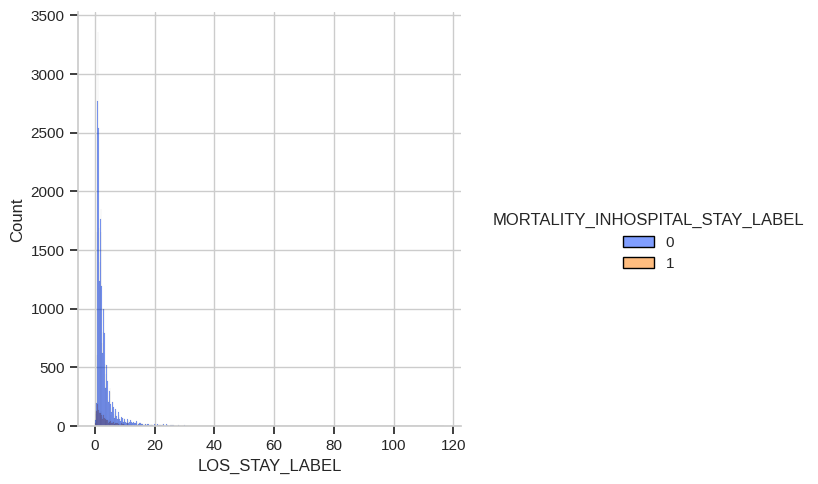

In [25]:
# histogram of length of stay vs. mortality
plt.style.reload_library()
plt.style.use('default')
plt.style.use('seaborn-whitegrid')
sns.set_palette('bright')
sns.set_context('notebook')
sns.displot(data = combined_subject_df, x='LOS_STAY_LABEL', hue='MORTALITY_INHOSPITAL_STAY_LABEL');

In [26]:
from scipy.stats import mode
from sklearn.impute import SimpleImputer, KNNImputer

# fill in null height/weight values (need to do within CV loop)
# measure_cols = ['HEIGHT', 'WEIGHT'] + [x for x in ts_cols if x not in ['Height', 'Weight'] and x in combined_subject_df.columns] # Note: BMI = (weight in kg) / (height in meters)^2
# knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
# imputed_meas_vals = knn_imputer.fit_transform(combined_subject_df[measure_cols + dem_cols])
# imputed_meas_vals
# imputed_meas_vals.shape

# check for no null values lefft
# combined_subject_df[measure_cols + dem_cols] = imputed_meas_vals
# combined_subject_df = combined_subject_df.drop(['Height', 'Weight'], axis=1)
# np.any(combined_subject_df.isna().sum() > 0)

In [30]:
# outcome columns
label_cols = [x for x in combined_subject_df.columns if 'LABEL' in x]
label_cols

# all mortality label columns are equivalent
np.mean(combined_subject_df['MORTALITY_INHOSPITAL_STAY_LABEL'])
combined_subject_df['LOS_STAY_LABEL'].describe()
combined_subject_df['MORTALITY_INHOSPITAL_STAY_LABEL'].value_counts()
combined_subject_df['MORTALITY_STAY_LABEL'].value_counts()
combined_subject_df['MORTALITY_EPISODE_LABEL'].value_counts()

['LOS_STAY_LABEL',
 'MORTALITY_STAY_LABEL',
 'MORTALITY_INHOSPITAL_STAY_LABEL',
 'LOS_EPISODE_LABEL',
 'MORTALITY_EPISODE_LABEL']

0.1050481470674059

count    41124.000000
mean         3.636725
std          5.219812
min          0.079900
25%          1.164900
50%          2.016400
75%          3.762125
max        116.832700
Name: LOS_STAY_LABEL, dtype: float64

0    36804
1     4320
Name: MORTALITY_INHOSPITAL_STAY_LABEL, dtype: int64

0    36804
1     4320
Name: MORTALITY_STAY_LABEL, dtype: int64

0    36804
1     4320
Name: MORTALITY_EPISODE_LABEL, dtype: int64

In [31]:
# outlier detection and defining column types
binary_dem_cols = ['GENDER_MALE', 'RACE_WHITE', 'RACE_HISPANIC', 'RACE_BLACK', 'RACE_ASIAN', 'RACE_OTHER_UNKNOWN']
binary_diag_cols = ['Septicemia (except in labor)', 'Diabetes mellitus without complication',
                    'Diabetes mellitus with complications', 'Disorders of lipid metabolism',
                    'Fluid and electrolyte disorders', 'Essential hypertension',
                    'Hypertension with complications and secondary hypertension', 'Acute myocardial infarction',
                    'Coronary atherosclerosis and other heart disease', 'Conduction disorders', 'Cardiac dysrhythmias',
                    'Congestive heart failure; nonhypertensive', 'Acute cerebrovascular disease',
                    'Pneumonia (except that caused by tuberculosis or sexually transmitted disease)',
                    'Chronic obstructive pulmonary disease and bronchiectasis', 'Pleurisy; pneumothorax; pulmonary collapse',
                    'Respiratory failure; insufficiency; arrest (adult)', 'Other lower respiratory disease',
                    'Other upper respiratory disease', 'Other liver diseases', 'Gastrointestinal hemorrhage',
                    'Acute and unspecified renal failure', 'Chronic kidney disease',
                    'Complications of surgical procedures or medical care', 'Shock',
                    'ADMIT_DIAG_CARDIAC_ARREST', 'ADMIT_DIAG_BRAIN_HEMORRHAGE', 'ADMIT_DIAG_LIVER FAILURE',
                    'ADMIT_DIAG_CEREBROVASCULAR ACCIDENT', 'ADMIT_DIAG_SEPSIS', 'ADMIT_DIAG_HYPOXIA',
                    'ADMIT_DIAG_RESPIRATORY DISTRESS']
cont_cols = ['AGE', 'HEIGHT', 'WEIGHT', 'Hours', 'Capillary refill rate', 'Diastolic blood pressure',
             'Fraction inspired oxygen', 'Glascow coma scale total', 'Glucose', 'Heart Rate',
             'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate',
             'Systolic blood pressure', 'Temperature', 'pH']

# describe feature ranges
combined_subject_df.columns = [x.upper() for x in combined_subject_df.columns]
binary_dem_cols = [x.upper() for x in binary_dem_cols]
binary_diag_cols = [x.upper() for x in binary_diag_cols]
cont_cols = [x.upper() for x in cont_cols]
combined_subject_df[binary_dem_cols].agg([np.min, np.max, np.mean, np.std])
combined_subject_df[binary_diag_cols].agg([np.min, np.max, np.mean, np.std])
combined_subject_df[cont_cols].agg([np.min, np.max, np.mean, np.std])

,GENDER_MALE,RACE_WHITE,RACE_HISPANIC,RACE_BLACK,RACE_ASIAN,RACE_OTHER_UNKNOWN
amin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
amax,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.559211,0.716321,0.035284,0.096051,0.023417,0.128927
std,0.496488,0.450788,0.184498,0.294665,0.151226,0.335123


,SEPTICEMIA (EXCEPT IN LABOR),DIABETES MELLITUS WITHOUT COMPLICATION,DIABETES MELLITUS WITH COMPLICATIONS,DISORDERS OF LIPID METABOLISM,FLUID AND ELECTROLYTE DISORDERS,ESSENTIAL HYPERTENSION,HYPERTENSION WITH COMPLICATIONS AND SECONDARY HYPERTENSION,ACUTE MYOCARDIAL INFARCTION,CORONARY ATHEROSCLEROSIS AND OTHER HEART DISEASE,CONDUCTION DISORDERS,...,CHRONIC KIDNEY DISEASE,COMPLICATIONS OF SURGICAL PROCEDURES OR MEDICAL CARE,SHOCK,ADMIT_DIAG_CARDIAC_ARREST,ADMIT_DIAG_BRAIN_HEMORRHAGE,ADMIT_DIAG_LIVER FAILURE,ADMIT_DIAG_CEREBROVASCULAR ACCIDENT,ADMIT_DIAG_SEPSIS,ADMIT_DIAG_HYPOXIA,ADMIT_DIAG_RESPIRATORY DISTRESS
amin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
amax,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.141742,0.192491,0.094470,0.291168,0.267921,0.420436,0.130994,0.103759,0.323023,0.071442,...,0.132210,0.207713,0.077570,0.005325,0.018797,0.003550,0.001751,0.023052,0.002480,0.002942
std,0.348790,0.394261,0.292486,0.454306,0.442882,0.493635,0.337398,0.304952,0.467637,0.257566,...,0.338723,0.405675,0.267497,0.072781,0.135808,0.059479,0.041806,0.150071,0.049741,0.054164


,AGE,HEIGHT,HEIGHT,WEIGHT,WEIGHT,HOURS,CAPILLARY REFILL RATE,DIASTOLIC BLOOD PRESSURE,FRACTION INSPIRED OXYGEN,GLASCOW COMA SCALE TOTAL,GLUCOSE,HEART RATE,MEAN BLOOD PRESSURE,OXYGEN SATURATION,RESPIRATORY RATE,SYSTOLIC BLOOD PRESSURE,TEMPERATURE,PH
amin,18.020534,0.000000,0.000000,0.000000,0.000000e+00,-0.981944,0.000000,5.333333,0.000000,3.000000,24.000000,26.357143,17.428571,29.833333,6.562500,8.666667,0.000000,0.000000
amax,310.165640,445.000000,445.000000,8088.996854,1.373374e+06,2803.028889,1.000000,2365.267000,10.010000,15.000000,18321.000000,103185.154639,1194.721899,48397.260870,15828.530201,3122.468936,266.801932,99.000000
mean,74.988042,168.747673,168.745747,81.972816,1.228962e+02,85.204208,0.150906,62.161123,0.547666,12.838112,137.302349,86.849685,79.025561,98.471049,19.309118,121.450133,36.831682,7.423933
std,55.843379,15.507370,15.500760,50.854917,7.458145e+03,124.800750,0.303930,26.899803,0.208435,2.751429,104.653272,509.449436,13.205701,246.566236,78.195045,29.820355,1.363343,1.859441


In [32]:
# outlier checking
var_ranges = pd.read_csv('../mimic3-Original/mimic3benchmark/resources/variable_ranges.csv')
var_ranges.head()
for var in var_ranges.LEVEL2.values:
    if var.upper() in cont_cols:
        print(var)
        val_low = var_ranges[var_ranges.LEVEL2==var]['VALID LOW'].values[0]
        val_high = var_ranges[var_ranges.LEVEL2==var]['VALID HIGH'].values[0]
        combined_subject_df[var.upper()] = np.clip(combined_subject_df[var.upper()], a_min=val_low, a_max=val_high)

,LEVEL2,LEVEL1,OUTLIER LOW,VALID LOW,IMPUTE,VALID HIGH,OUTLIER HIGH
0,Alanine aminotransferase,NaN,0.0,2.0,34.0,10000.0,11000.0
1,Albumin,NaN,0.0,0.6,3.1,6.0,60.0
2,Alkaline phosphate,NaN,0.0,20.0,106.0,3625.0,4000.0
3,Anion Gap,NaN,0.0,5.0,13.0,50.0,55.0
4,Asparate aminotransferase,NaN,0.0,6.0,40.0,20000.0,22000.0


Capillary refill rate
Diastolic blood pressure
Fraction inspired oxygen
Glascow coma scale total
Glucose
Heart rate
Height
Mean blood pressure
Oxygen saturation
pH
Respiratory rate
Systolic blood pressure
Temperature
Weight


In [33]:
# check continuous ranges again
combined_subject_df[cont_cols].agg([min, max, np.mean, np.std])
np.sum(combined_subject_df['HOURS'] < 0)
combined_subject_df = combined_subject_df[combined_subject_df.HOURS >= 0].reset_index(drop=True)

,AGE,HEIGHT,HEIGHT,WEIGHT,WEIGHT,HOURS,CAPILLARY REFILL RATE,DIASTOLIC BLOOD PRESSURE,FRACTION INSPIRED OXYGEN,GLASCOW COMA SCALE TOTAL,GLUCOSE,HEART RATE,MEAN BLOOD PRESSURE,OXYGEN SATURATION,RESPIRATORY RATE,SYSTOLIC BLOOD PRESSURE,TEMPERATURE,PH
min,18.020534,0.000000,0.00000,0.000000,0.000000,-0.981944,0.000000,5.333333,0.210000,3.000000,33.000000,26.357143,17.428571,29.833333,6.562500,8.666667,26.000000,6.300000
max,310.165640,240.000000,240.00000,250.000000,250.000000,2803.028889,1.000000,375.000000,1.000000,15.000000,2000.000000,350.000000,330.000000,100.000000,300.000000,375.000000,45.000000,8.400000
mean,74.988042,168.660311,168.65846,81.627274,82.108910,85.204208,0.150906,61.850689,0.546267,12.838112,136.770637,84.337491,78.980506,96.844524,18.930059,121.220575,36.823180,7.381889
std,55.843379,14.574049,14.56783,24.195402,23.869922,124.800750,0.303930,14.480451,0.154359,2.751429,41.430800,14.122754,11.233327,2.455076,3.891898,16.903349,0.601153,0.077611


3

In [34]:
# write new processed df to csv
combined_subject_df.head()
combined_subject_df.shape
combined_subject_df.SUBJECT_ID.nunique()
combined_subject_df.ICUSTAY_ID.nunique()
combined_subject_df.to_csv('../data/MIMIC3_FULL_PROCESSED_DATASET_20221022.csv', index=False)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ADMITTIME,DISCHTIME,ETHNICITY,GENDER,AGE,LOS_STAY_LABEL,MORTALITY_STAY_LABEL,...,ADMIT_DIAG_CEREBROVASCULAR ACCIDENT,ADMIT_DIAG_SEPSIS,ADMIT_DIAG_HYPOXIA,ADMIT_DIAG_RESPIRATORY DISTRESS,GENDER_MALE,RACE_WHITE,RACE_HISPANIC,RACE_BLACK,RACE_ASIAN,RACE_OTHER_UNKNOWN
0,50447,127105,253123,2164-06-17 03:06:00,2164-06-24 13:00:00,WHITE,F,53.719370,1.4437,0,...,0,0,0,0,0,1,0,0,0,0
1,78238,195560,224253,2150-09-29 21:20:00,2150-10-01 14:00:00,WHITE,F,77.275838,0.8005,0,...,0,0,0,0,0,1,0,0,0,0
2,78238,148934,259839,2150-10-23 10:43:00,2150-10-28 12:34:00,WHITE,F,77.341547,2.4825,0,...,0,0,0,0,0,1,0,0,0,0
3,13966,166620,231548,2187-10-07 20:04:00,2187-10-10 14:44:00,WHITE,M,74.349076,0.9708,0,...,0,0,0,0,1,1,0,0,0,0
4,351,174800,281750,2171-07-16 23:13:00,2171-07-25 19:36:00,BLACK/AFRICAN AMERICAN,F,51.071869,3.8597,0,...,0,0,0,0,0,0,0,1,0,0


(41121, 70)

33281

41121